In [2]:
import matplotlib.pyplot as plt # https://matplotlib.org/api/pyplot_summary.html
import numpy as np # https://docs.scipy.org/doc/numpy/reference/
import pandas as pd # https://pandas.pydata.org/pandas-docs/stable/
import scipy.special as spec # https://docs.scipy.org/doc/scipy/reference/special.html
import scipy.stats as st # https://docs.scipy.org/doc/scipy/reference/stats.html
import seaborn as sns # https://seaborn.pydata.org/api.html
%matplotlib inline

In [5]:
retention = pd.read_csv('Retention.csv')
retention.head()

,spend,apret,top10,rejr,tstsc,pacc,strat,salar
0,9855,52.50,15,29.474,65.063,36.887,12.0,60800
1,10527,64.25,36,22.309,71.063,30.970,12.8,63900
2,7904,37.75,26,25.853,60.750,41.985,20.3,57800
3,6601,57.00,23,11.296,67.188,40.289,17.0,51200
4,7251,62.00,17,22.635,56.250,46.780,18.1,48000


# a. Generate descriptive statistics and plot histograms for the following three columns: apret, tstsc, and salar.

In [99]:
print('The descriptive statistics of the following three columns: apret, tstsc, and salar')
desc_retention = pd.DataFrame({ 'apret': retention.apret,
                                'tstsc': retention.tstsc,
                                'salar': retention.salar })
desc_retention.describe(include='all')

The descriptive statistics of the following three columns: apret, tstsc, and salar


,apret,salar,tstsc
count,170.000000,170.000000,170.000000
mean,56.721076,61357.647059,66.164165
std,18.077097,9802.786457,6.975306
min,18.750000,38640.000000,48.125000
25%,45.374750,54650.000000,61.111000
50%,55.708500,61150.000000,64.781500
75%,68.687500,67100.000000,70.453250
max,95.250000,87900.000000,87.500000


Plot histograms for the following three columns


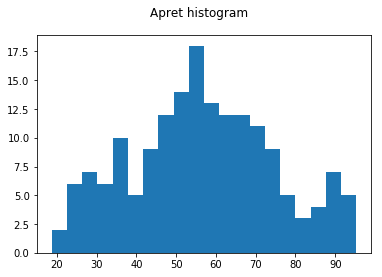

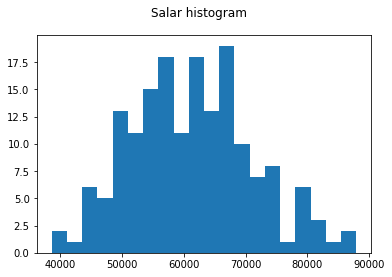

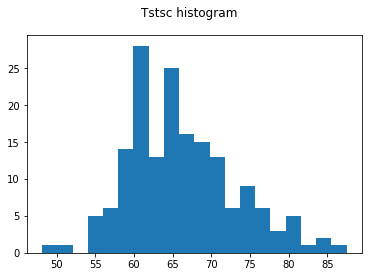

In [53]:
print('Plot histograms for the following three columns')
plt.hist(retention.apret, 20)
plt.suptitle('Apret histogram')
plt.show()

plt.hist(retention.salar, 20)
plt.suptitle('Salar histogram')
plt.show()

plt.hist(retention.tstsc, 20)
plt.suptitle('Tstsc histogram')
plt.show()

# b. Perform linear regression of apret on tstsc and salar separately and then of apret on both tstsc and salar. 

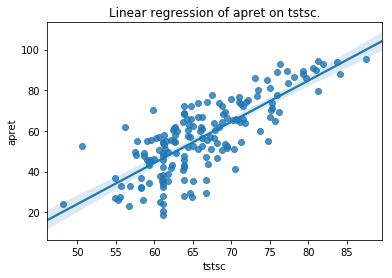

In [95]:
sns.regplot(x='tstsc', y='apret', data=retention[['apret','tstsc']])
_ = plt.title('Linear regression of apret on tstsc.')

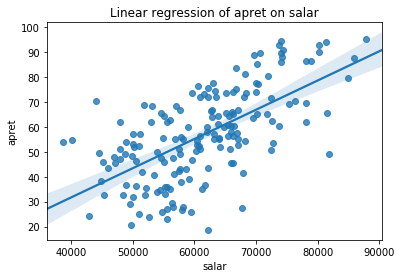

In [132]:
sns.regplot(x='salar', y='apret', data=retention[['apret', 'salar']])
result = plt.title('Linear regression of apret on salar')

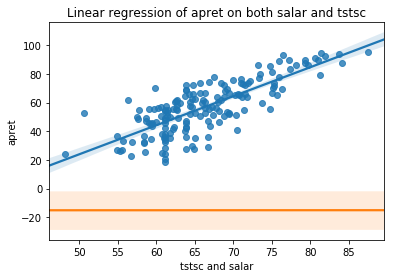

In [137]:
sns.regplot(x='tstsc', y='apret', data=retention[['apret','tstsc']])
sns.regplot(x='salar', y='apret', data=retention[['apret', 'salar']])
result = plt.title('Linear regression of apret on both salar and tstsc')
plt.xlabel('tstsc and salar')
plt.show()

# c. Test normality of each colum

In [128]:
import scipy.stats as stats
# H0: make an assumption that all colums in retention table obey normal distribution
# alpha level is .05 for a two-tail test.
# if p-value > alpha, 
# if p-value <= alpha/2, we should reject H0 and make an assumption that the colum doesn't obey normal distribution.
def check_norm(data, colum_name):
    alpha=.05
    p_value = stats.shapiro(data)[1]
    if p_value>alpha/2:
        print(colum_name, "obey normal distribution")
    else: 
        print(colum_name, "does not obey normal distribution")

check_norm(retention.spend, 'spend')
check_norm(retention.apret, 'apret')
check_norm(retention.top10, 'top10')
check_norm(retention.rejr, 'rejr')
check_norm(retention.tstsc, 'tstsc')
check_norm(retention.pacc, 'pacc')
check_norm(retention.strat, 'strat')
check_norm(retention.salar, 'salar')

spend does not obey normal distribution
apret obey normal distribution
top10 does not obey normal distribution
rejr does not obey normal distribution
tstsc does not obey normal distribution
pacc does not obey normal distribution
strat obey normal distribution
salar obey normal distribution


# d. Correlation & Coefficient

In [126]:
print('Correlation matrix using pearson method')
retention.corr(method='pearson')

Correlation matrix using pearson method


,spend,apret,top10,rejr,tstsc,pacc,strat,salar
spend,1.000000,0.601231,0.675656,0.633544,0.714910,-0.236730,-0.561755,0.711838
apret,0.601231,1.000000,0.642464,0.514958,0.782183,-0.302834,-0.458311,0.635852
top10,0.675656,0.642464,1.000000,0.643163,0.798807,-0.207505,-0.247857,0.637648
rejr,0.633544,0.514958,0.643163,1.000000,0.628601,-0.071521,-0.283617,0.606777
tstsc,0.714910,0.782183,0.798807,0.628601,1.000000,-0.164223,-0.465226,0.715472
pacc,-0.236730,-0.302834,-0.207505,-0.071521,-0.164223,1.000000,0.131858,-0.375240
strat,-0.561755,-0.458311,-0.247857,-0.283617,-0.465226,0.131858,1.000000,-0.347673
salar,0.711838,0.635852,0.637648,0.606777,0.715472,-0.375240,-0.347673,1.000000


In [130]:
# As can be seen in table above, the correlation of salar and tstsc is close. 
# Then we want to find the coeffecient of these two variables.
# Find the P-value of the TV feature and the 95% confidence interval of the corresponding coefficients.

import statsmodels.formula.api as smf
model=smf.ols('tstsc ~ salar', retention) 
Fitting_results=model.fit() 
print(Fitting_results.summary().tables[1])
print('p-values are:\n',Fitting_results.pvalues)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.9268      2.383     14.657      0.000      30.222      39.631
salar          0.0005   3.84e-05     13.274      0.000       0.000       0.001
p-values are:
 Intercept    7.358734e-32
salar        5.840126e-28
dtype: float64
